In [26]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#df = pd.read_csv("./Downloads/covid_data/WHO-COVID-19-global-data (1).csv")
#df2 = df.groupby(['Country']).agg({'New_cases': 'mean', 'New_deaths': 'mean'})
#df.size    
df = pd.read_csv("./Downloads/covid_19_india.csv")
df2 = df.groupby(['State/UnionTerritory']).agg({'Cured': 'mean', 'Deaths': 'mean', 'Confirmed': 'mean'})
df2.size

X = StandardScaler().fit_transform(df2)
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=39, centers=centers, cluster_std=0.4,
                            random_state=0)

df2.head(n=39)



,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,791.078125,12.953125,992.109375
Andhra Pradesh,112389.616505,1303.854369,144683.936893
Arunachal Pradesh,1233.298913,3.211957,1807.875000
Assam,32840.709677,130.284946,42665.365591
Bihar,39399.836735,241.668367,47596.515306
Cases being reassigned to states,0.000000,0.000000,5759.416667
Chandigarh,1334.366834,25.316583,1964.643216
Chhattisgarh,9567.336683,128.241206,15904.934673
Dadar Nagar Haveli,0.378378,0.000000,5.027027


In [28]:
# Compute DBSCAN
#X = StandardScaler().fit_transform(df)
db = DBSCAN(eps=0.395555, min_samples=6).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_clusters_=3
n_noise_ = list(labels).count(-1)
#n_noise_=1
print(len((labels)))
for i in range(0,len((db.labels_))):
    if(labels[i]==-1):
        print((df2.index[i]))
        #print('\n')
        
print('\n')        
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



[ 0  0 -1 -1  0 -1  1 -1 -1  2  2  0  1  1 -1  1  2  0  1  1 -1 -1  2 -1
 -1  2  2  2  0  2  1 -1  2  2  1  1  0  2  0]
39
Arunachal Pradesh
Assam
Cases being reassigned to states
Chhattisgarh
Dadar Nagar Haveli
Haryana
Ladakh
Madhya Pradesh
Manipur
Meghalaya
Sikkim


Estimated number of clusters: 3
Estimated number of noise points: 11
Homogeneity: 0.734
Completeness: 0.585
V-measure: 0.651
Adjusted Rand Index: 0.544
Adjusted Mutual Information: 0.625
Silhouette Coefficient: 0.387


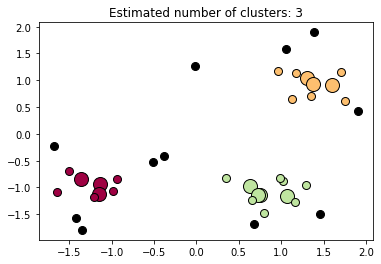

In [29]:
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Number of clusters: 1
Homogeneity: 1.0
Completeness: 1.0


ValueError: Found input variables with inconsistent numbers of samples: [126, 39]

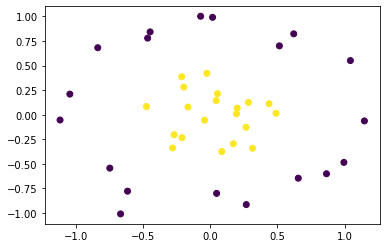

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

#df = pd.read_csv("./Downloads/covid_data/WHO-COVID-19-global-data (1).csv")
#df2 = df.groupby(['Country']).agg({'New_cases': 'mean', 'New_deaths': 'mean'})
#df2.size 
df = pd.read_csv("./Downloads/covid_19_india.csv")
df2 = df.groupby(['State/UnionTerritory']).agg({'Cured': 'mean', 'Deaths': 'mean', 'Confirmed': 'mean'})
df2.size
X = StandardScaler().fit_transform(df2)
X, labels_true = make_blobs(n_samples=126, centers=centers, cluster_std=0.4,
                            random_state=0)
X, y = make_circles(n_samples=39, factor=0.3, noise=0.1)
#X = StandardScaler().fit_transform(df2)
y_pred = DBSCAN(eps=0.395555, min_samples=6).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

In [104]:
db = DBSCAN(eps=0.01, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

[ 0 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
  0  1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1]


In [198]:
df2['Labels']=db.labels_
df2.head

ValueError: Length of values (126) does not match length of index (42)